# Module 1 Practice: John Snow's Cholera Map 

In this practice, we will load the data for John Snow's cholera map from `/dsa/data/all_datasets/CholeraDeathsPumps.csv`. It has the number of deaths and geographical coordinates of the deaths and water pumps (where count is -999). 

We will do simple scatter plots using the **`ggplot2`** library; it has many useful functions to create nice plots and graphics. Here is a handy [cheatsheet for ggplot2 library](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf), and the [full documentation](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf).

**The following are examples to start using ggplot for simple plots:** 

In [1]:
# load ggplot library 
library(ggplot2)

# First, make up a data frame 
df <- data.frame(replicate(3,sample(0:100,10,rep=TRUE)))
df
str(df)

X1,X2,X3
<int>,<int>,<int>
46,20,10
61,54,72
4,46,68
49,87,62
42,57,17
73,84,6
64,38,9
38,88,47
66,66,100


'data.frame':	10 obs. of  3 variables:
 $ X1: int  46 61 4 49 42 73 64 38 66 70
 $ X2: int  20 54 46 87 57 84 38 88 66 16
 $ X3: int  10 72 68 62 17 6 9 47 100 19


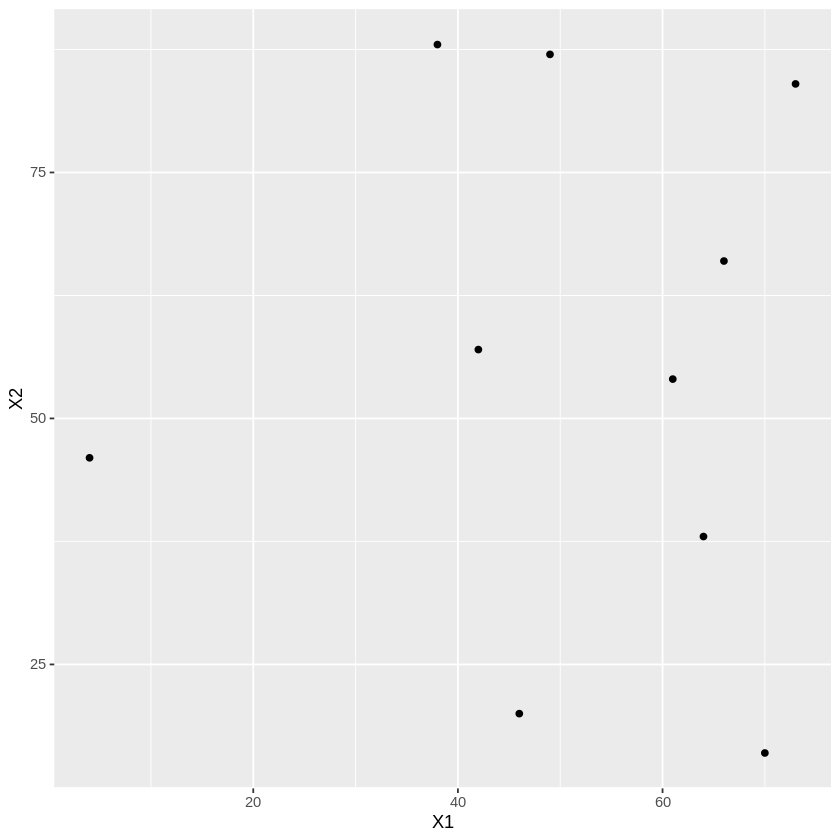

In [2]:
# every ggplot "object" should define the data frame to be used for plotting, 
# and the "aesthetics" that is the mapping between the columns of the data set and the plot. 
plot1 <- ggplot(data=df, mapping=aes(x=X1, y=X2))

# now add a "geom" to tell what type of plot it'll be: here, it's a scatter plot. 
plot1 <- plot1 + geom_point()

# display it. 
plot1

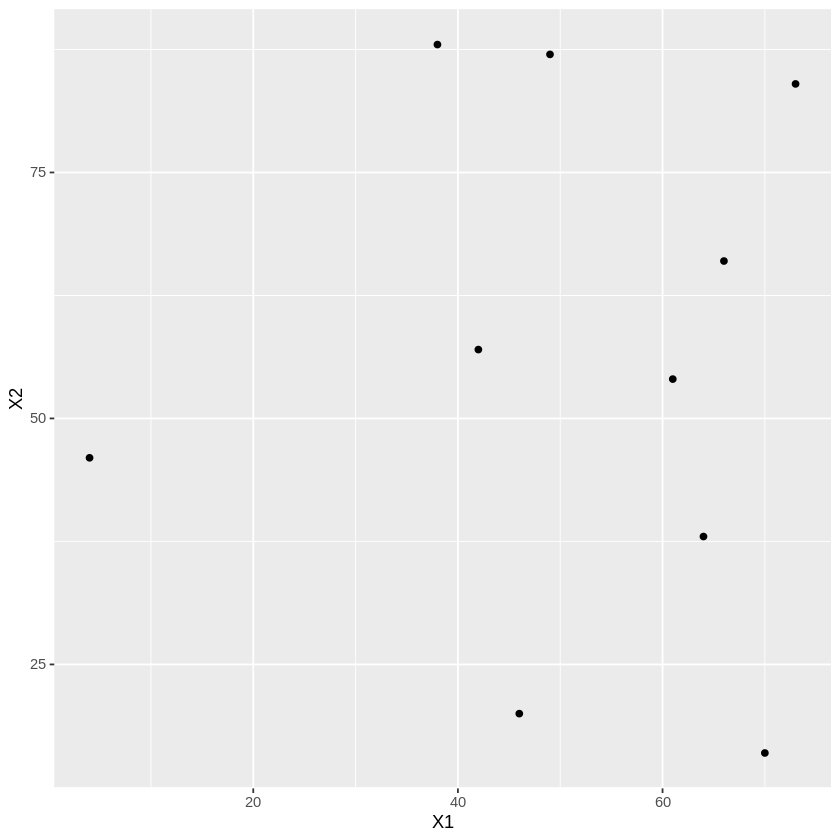

In [3]:
# The following is same as above, relying on defaults and doing everything in one line: 

ggplot(df, aes(X1, X2)) + geom_point() 


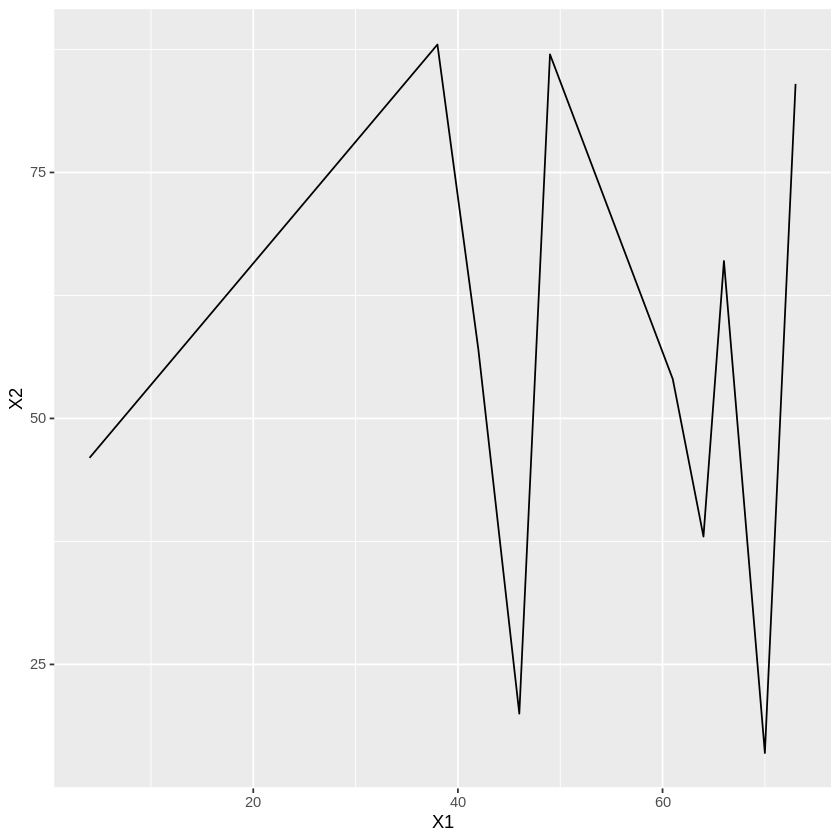

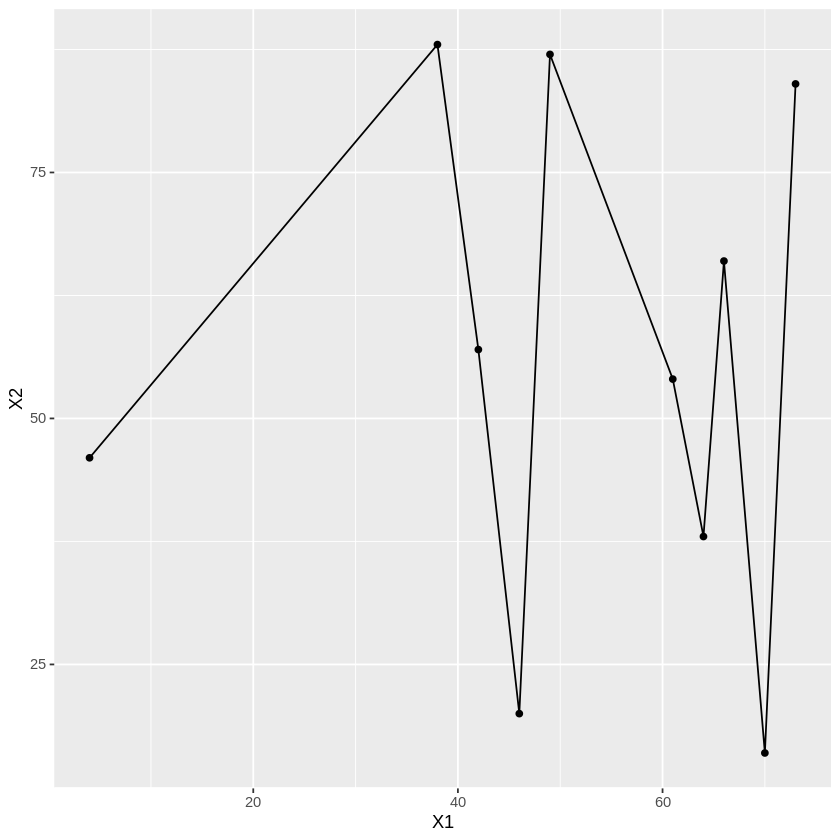

In [4]:
# Let's do a line plot: 

p1 <- ggplot(df, aes(x=X1,y=X2)) + geom_line() 
p1

# or both, we can keep adding different layers like this: 

p1 <- p1 + geom_point()
p1


**Now, we will do the following activities:** 

In [5]:
# Activity 1: read the Cholera data into a data frame, show head and tail 

df <- read.csv("/dsa/data/all_datasets/CholeraDeathsPumps.csv")

head(df)
tail(df)


count,long,lat
<int>,<dbl>,<dbl>
3,-0.137930,51.51342
2,-0.137883,51.51336
1,-0.137853,51.51332
1,-0.137812,51.51326
4,-0.137767,51.51320
2,-0.137537,51.51318


,count,long,lat
,<int>,<dbl>,<dbl>
253,-999,-0.139671,51.51491
254,-999,-0.131630,51.51235
255,-999,-0.133594,51.51214
256,-999,-0.135919,51.51154
257,-999,-0.133962,51.51002
258,-999,-0.138199,51.51129


In [12]:
# Activity 2: separate deaths and pumps to separate data frames 

wpumps <- df[df$count == -999, ]
cdeaths <- df[df$count != -999, ]

#head(wpumps)
#head(cdeaths)
#tail(cdeaths)
#summary(cdeaths)

,count,long,lat
,<int>,<dbl>,<dbl>
251,-999,-0.136668,51.51334
252,-999,-0.139586,51.51388
253,-999,-0.139671,51.51491
254,-999,-0.131630,51.51235
255,-999,-0.133594,51.51214
256,-999,-0.135919,51.51154


count,long,lat
<int>,<dbl>,<dbl>
3,-0.137930,51.51342
2,-0.137883,51.51336
1,-0.137853,51.51332
1,-0.137812,51.51326
4,-0.137767,51.51320
2,-0.137537,51.51318


,count,long,lat
,<int>,<dbl>,<dbl>
245,2,-0.137707,51.51479
246,3,-0.137108,51.51453
247,2,-0.137065,51.51471
248,1,-0.138474,51.51231
249,1,-0.138123,51.51200
250,1,-0.137762,51.51186


     count             long              lat       
 Min.   : 1.000   Min.   :-0.1401   Min.   :51.51  
 1st Qu.: 1.000   1st Qu.:-0.1376   1st Qu.:51.51  
 Median : 1.000   Median :-0.1363   Median :51.51  
 Mean   : 1.956   Mean   :-0.1364   Mean   :51.51  
 3rd Qu.: 2.000   3rd Qu.:-0.1353   3rd Qu.:51.51  
 Max.   :15.000   Max.   :-0.1329   Max.   :51.52  

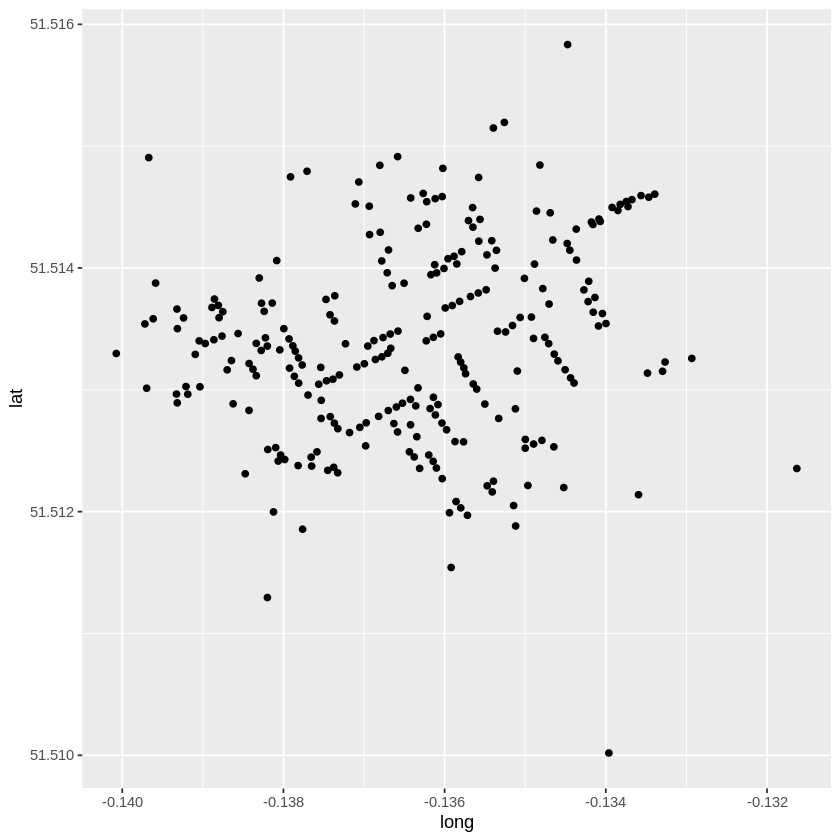

In [7]:
# Activity 3: plot all data points as a scatter plot; define aesthetics

ggplot(data = df, aes(x = long, y = lat)) + geom_point()

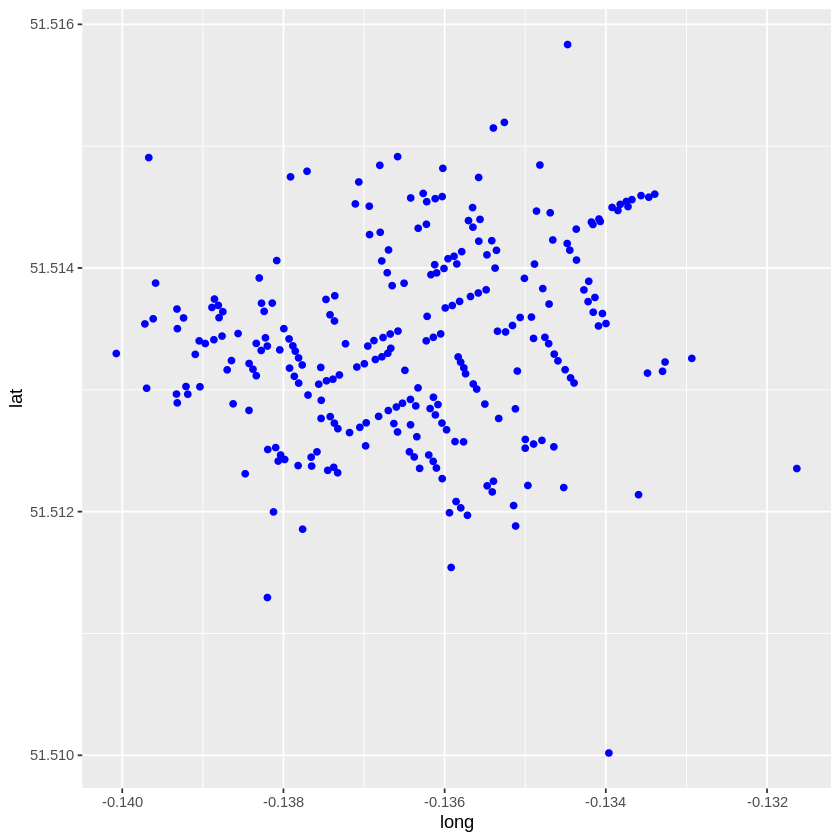

In [8]:
# Activity 4: change color of the points to blue 

ggplot(data = df, aes(x = long, y = lat)) + geom_point(color="blue")

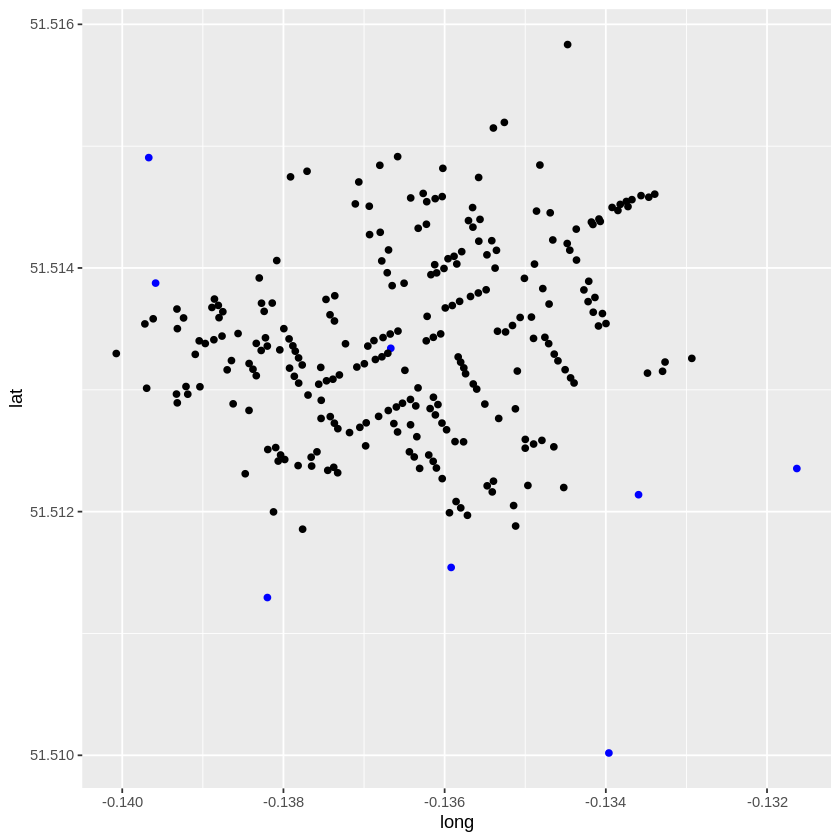

In [9]:
# Activity 5: plot deaths and pumps separately on the same plot (pumps: blue, deaths: black)

ggplot(data = wpumps, aes(x = long, y = lat)) +
    geom_point(color = "blue") +
    geom_point(data = cdeaths, color = "black")

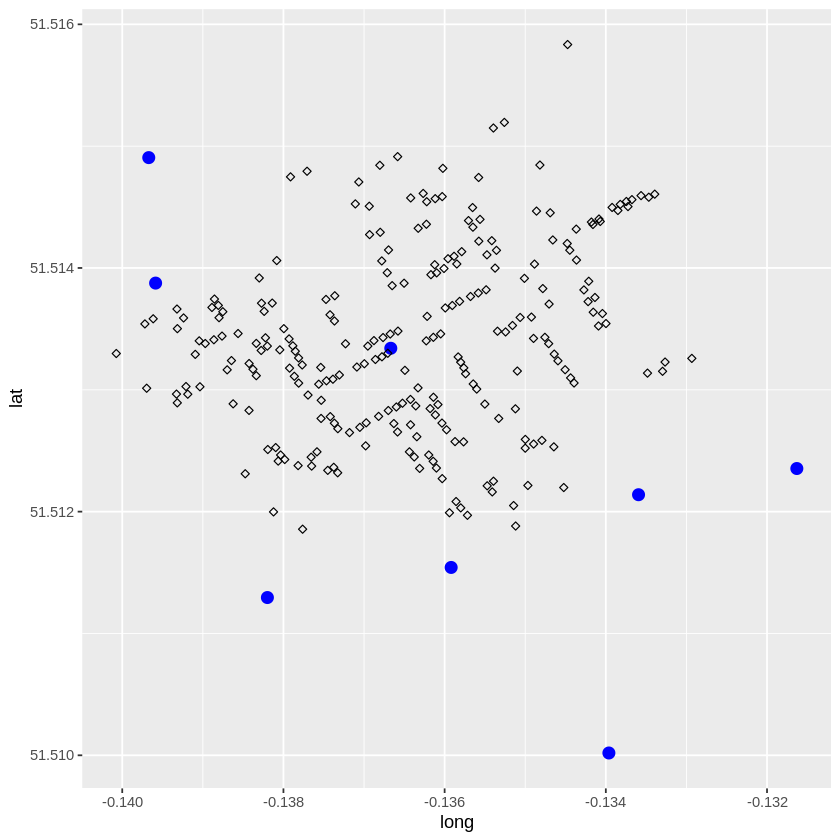

In [10]:
# Activity 6: Make pumps bigger, change the shape of deaths to diamond (hint: use shape=23)

ggplot(data = wpumps, aes(x = long, y = lat)) +
    geom_point(color = "blue", size = 3) +
    geom_point(data = cdeaths, shape=23,  color = "black")

### Question: Does this plot show counts of deaths ? How do we incorporate that column to this plot ? 


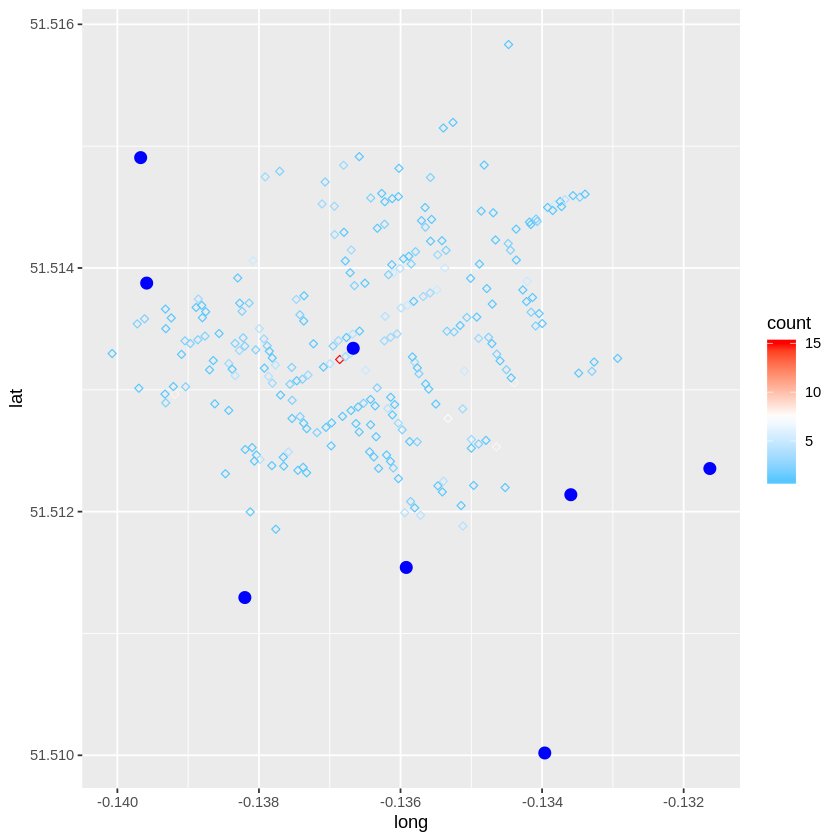

In [21]:
# Activity 7: FIND a way of showing number of deaths in the plot above

#mid <- median(cdeaths$count)
#mid

ggplot(data = cdeaths, aes(x = long, y = lat, color = count)) +
    geom_point(shape=23) +
    scale_color_gradient2(
        midpoint = 7.5,
        low = "deepskyblue",
        mid = "white",
        high = "red",
        space = "Lab"
    ) +
    geom_point(data = wpumps, color = "blue", size = 3)

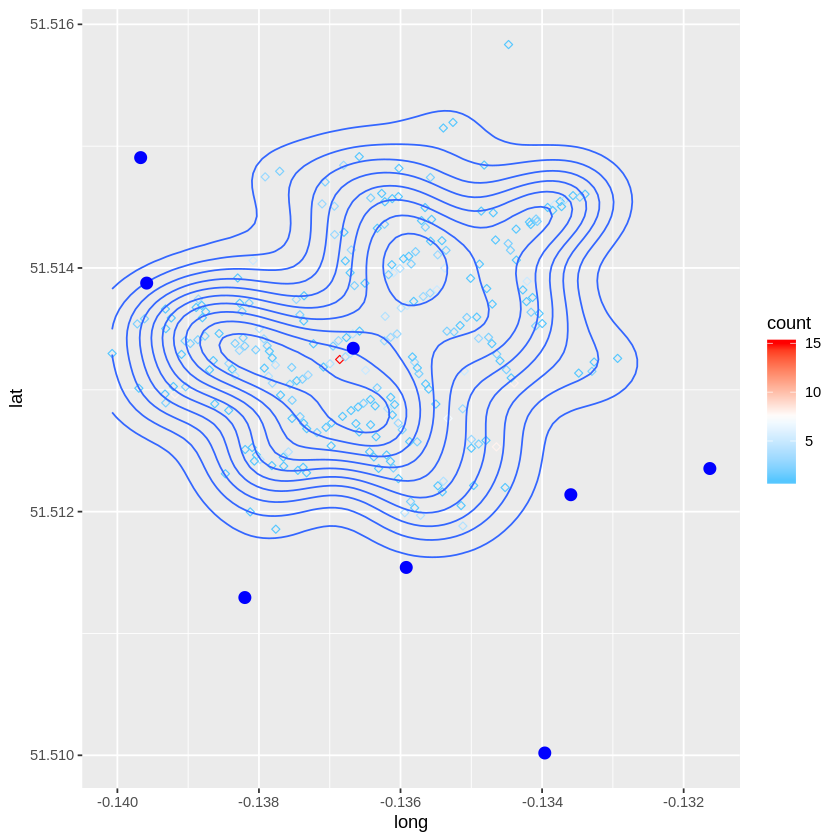

In [17]:
ggplot(data = cdeaths, aes(x = long, y = lat, color = count)) +
    geom_point(shape=23) +
    scale_color_gradient2(
        midpoint = 7.5,
        low = "deepskyblue",
        mid = "white",
        high = "red",
        space = "Lab"
    ) +
    geom_density2d() +
    geom_point(data = wpumps, color = "blue", size = 3)